In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

IMPORT MODULES

In [2]:
    import pandas as pd
    import numpy as np
    import os
    import seaborn as sns
    import matplotlib.pyplot as plt
    import librosa;
    import librosa.display
    from IPython.display import Audio
    import warnings
    warnings.filterwarnings('ignore')

Load the dataset

In [3]:
paths = []
labels = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
   
        label = filename.split('_')[-1]
        label = label.split(',')[0]
        labels.append(label.lower())
print("Dataset is loaded")

Dataset is loaded


PATHS:

In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

Labels

In [5]:
labels[:5]

['fear.wav', 'fear.wav', 'fear.wav', 'fear.wav', 'fear.wav']

CREATE A DATAFRAME

In [6]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear.wav
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear.wav
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear.wav
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear.wav
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear.wav


In [7]:
#How many labels are there
df['label'].value_counts()

label
fear.wav       800
angry.wav      800
disgust.wav    800
neutral.wav    800
sad.wav        800
ps.wav         800
happy.wav      800
Name: count, dtype: int64

DATA ANALAYSIS(EXPLOREATARY)

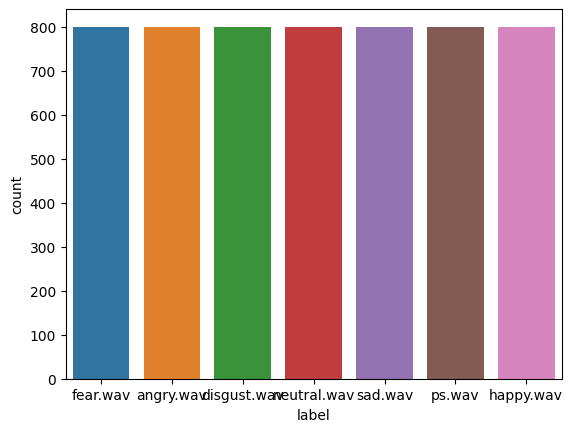

In [8]:
sns.countplot(x='label', data=df)
plt.show()

In [9]:
def waveplot(data,sr,emotion): # displaying waveplot
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
def spectogram(data,sr,emotion):
    x =librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

    FEAR

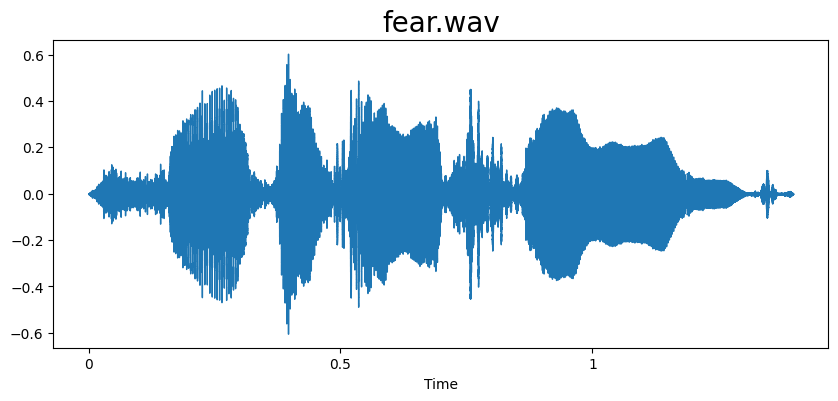

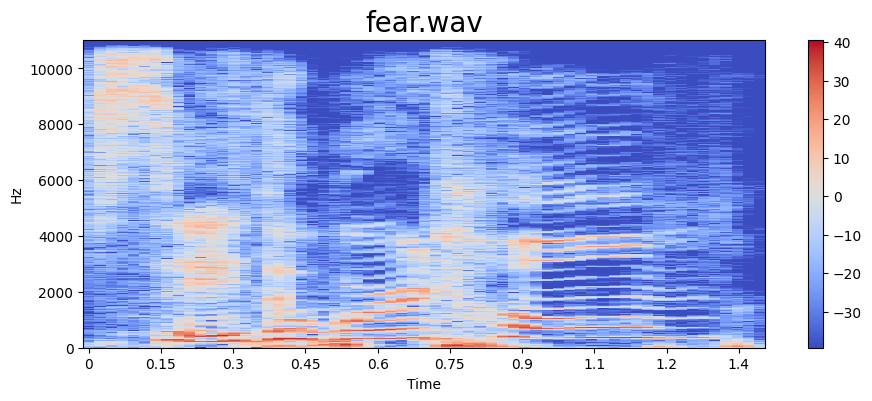

In [10]:
emotion = 'fear.wav'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data, sampling_rate,emotion)
Audio(path)

ANGRY

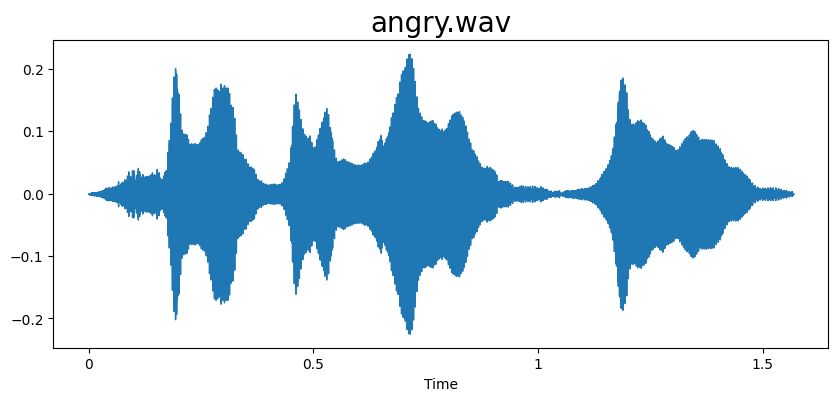

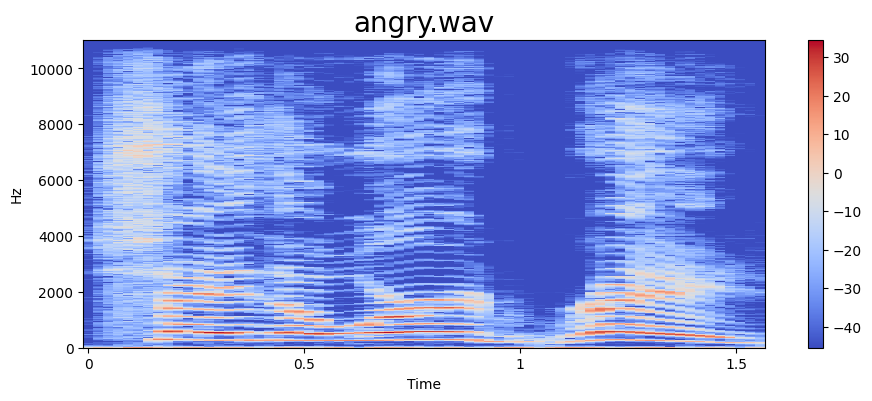

In [11]:
emotion = 'angry.wav'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data, sampling_rate,emotion)
Audio(path)

DISGUST

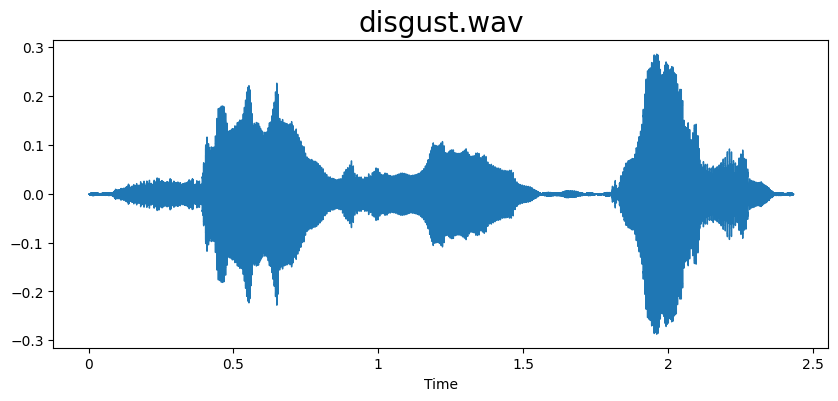

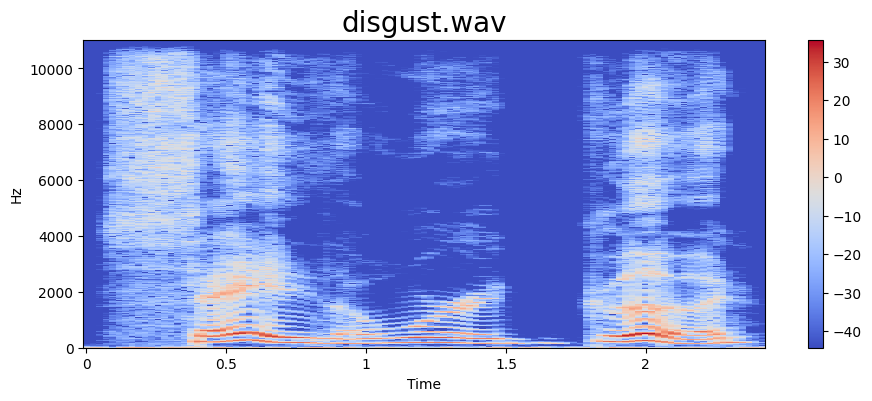

In [12]:
emotion = 'disgust.wav'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data, sampling_rate,emotion)
Audio(path)

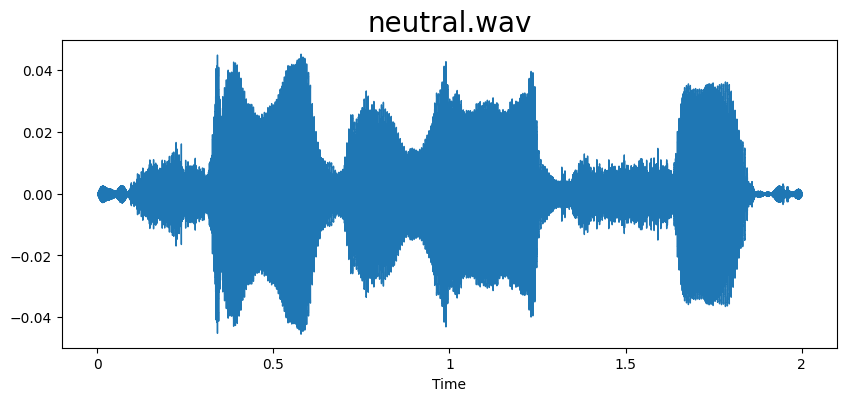

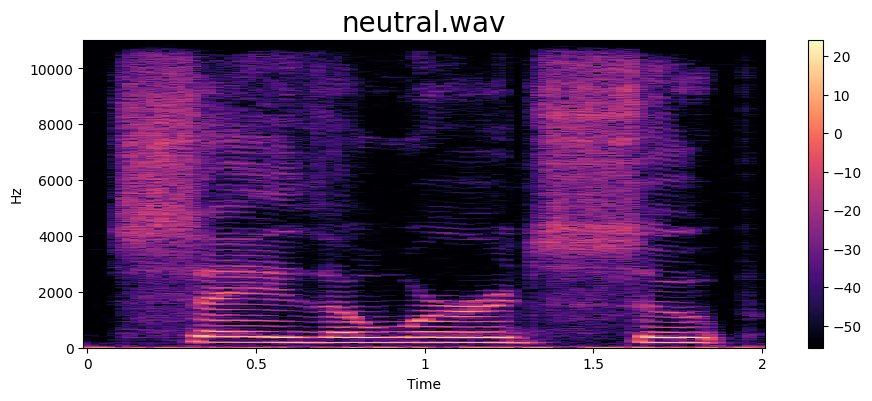

In [13]:
emotion = 'neutral.wav'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data, sampling_rate,emotion)
Audio(path)

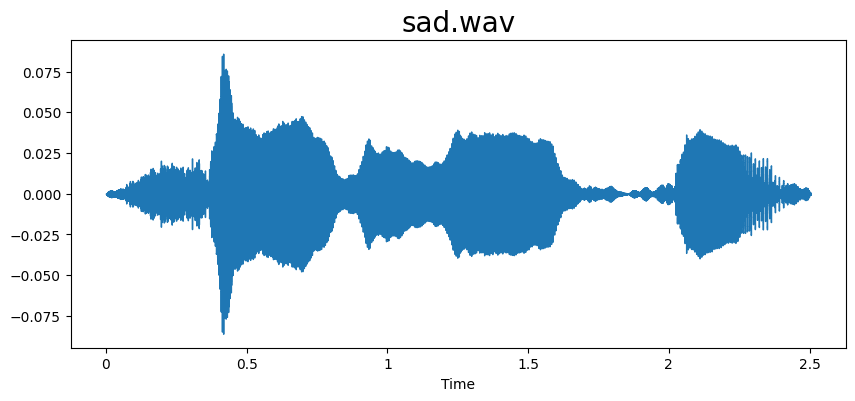

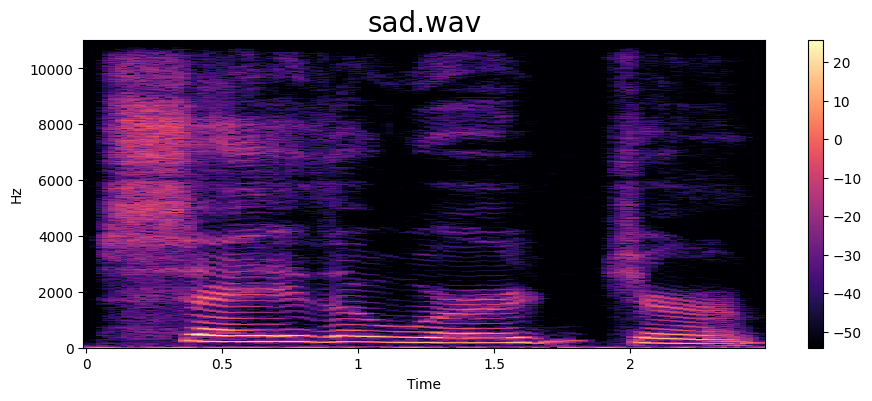

In [14]:
emotion = 'sad.wav'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data, sampling_rate,emotion)
Audio(path)

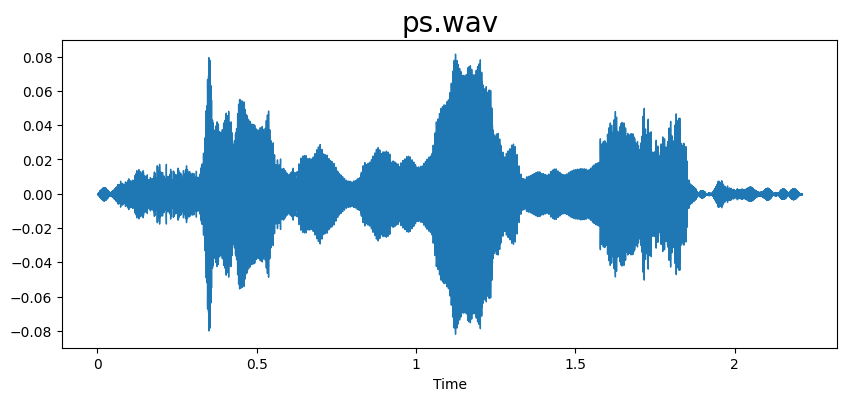

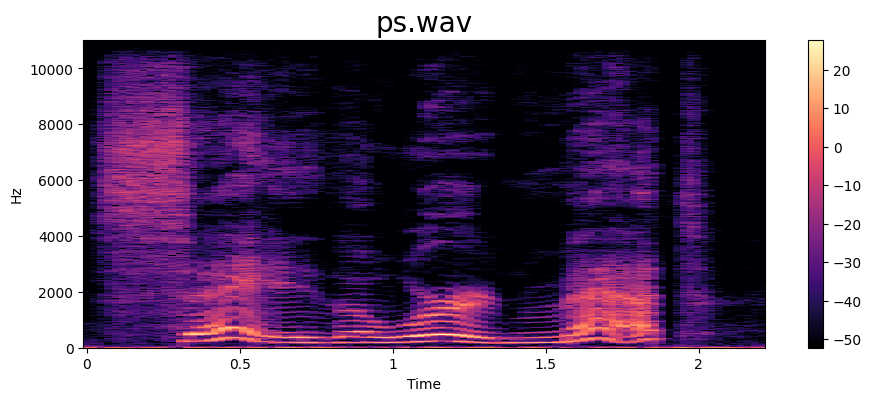

In [15]:
emotion = 'ps.wav'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data, sampling_rate,emotion)
Audio(path)

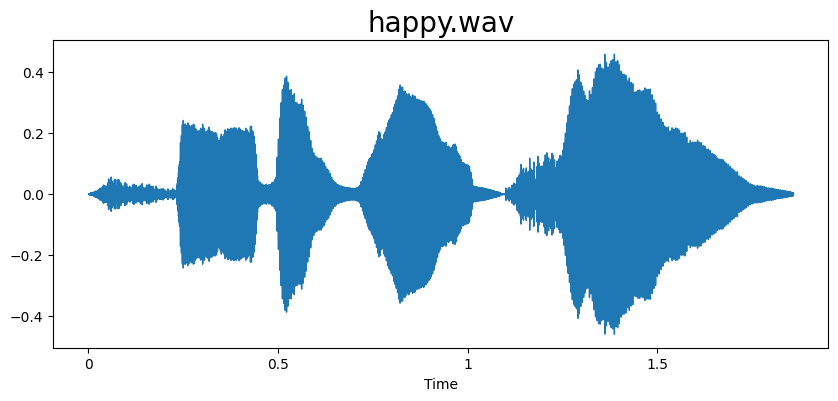

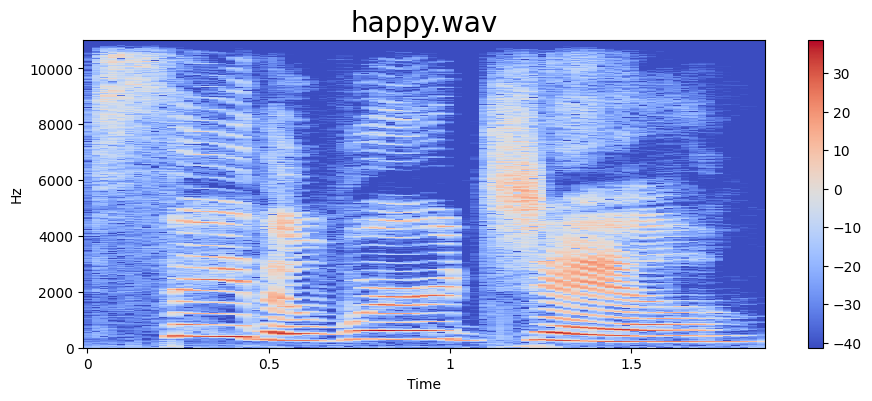

In [16]:
emotion = 'happy.wav'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data, sampling_rate,emotion)
Audio(path)

Feature EXTRACTION

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc  = np.mean(librosa.feature.mfcc(y=y, sr =sr,n_mfcc=40).T,axis = 0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 5600, dtype: object

In [21]:
X = [x for x in  X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [22]:
#input split
X = np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

Onhot encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y= enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

Number of samples and number of categories

In [25]:
y.shape

(5600, 7)

CREATE THE LSTM MODEL

In [26]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape = (40,1)),
    Dense(64 , activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [27]:
history = model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2390 - loss: 1.8943 - val_accuracy: 0.1312 - val_loss: 2.0863
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4501 - loss: 1.6197 - val_accuracy: 0.2768 - val_loss: 1.7936
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5848 - loss: 1.2410 - val_accuracy: 0.3500 - val_loss: 1.5322
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6803 - loss: 0.9025 - val_accuracy: 0.4018 - val_loss: 1.2035
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7491 - loss: 0.6828 - val_accuracy: 0.6277 - val_loss: 0.9378
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8179 - loss: 0.5172 - val_accuracy: 0.7652 - val_loss: 0.6293
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8769 - loss: 0.3768 - val_accuracy: 0.7705 - val_loss: 0.5880
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9034 - loss: 0.2816 - val_accuracy: 0.8902 - val_loss:

PLOT THE RESULT

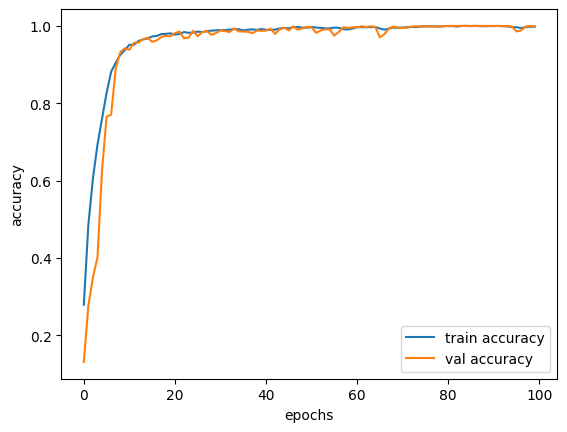

In [28]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs , acc , label = 'train accuracy')
plt.plot(epochs , val_acc , label = 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



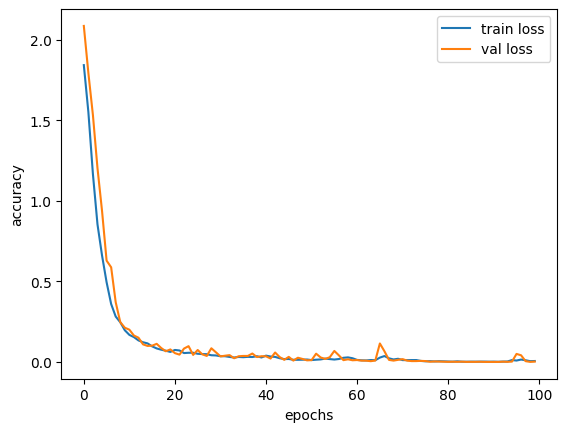

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs , loss , label = 'train loss')
plt.plot(epochs , val_loss , label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

